In [1]:
import numpy as np
import pandas as pd

In [3]:
url = 'spam.csv'
dataset = pd.read_csv(url, encoding='latin1') 

In [5]:
dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
857,ham,Hai ana tomarrow am coming on morning. &lt;DE...,NaN,NaN,NaN
3953,ham,I probably won't eat at all today. I think I'm...,NaN,NaN,NaN
2401,spam,Babe: U want me dont u baby! Im nasty and have...,NaN,NaN,NaN
2904,ham,Ha. You donÛ÷t know either. I did a a clever ...,NaN,NaN,NaN
894,ham,Doesn't g have class early tomorrow and thus s...,NaN,NaN,NaN


In [7]:
dataset.shape

(5572, 5)

In [9]:
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
dataset.sample(4)

,v1,v2
3941,ham,She's borderline but yeah whatever.
4547,ham,Hope you are having a good week. Just checking in
12,spam,URGENT! You have won a 1 week FREE membership ...
1740,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...


In [13]:
dataset.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [15]:
dataset.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder=LabelEncoder()

In [21]:
dataset['target']=encoder.fit_transform(dataset['target'])

In [23]:
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
dataset.isnull().sum()

target    0
text      0
dtype: int64

In [27]:
dataset.duplicated().sum()

403

In [29]:
dataset=dataset.drop_duplicates(keep='first')

In [31]:
dataset.duplicated().sum()

0

In [33]:
dataset.shape

(5169, 2)

In [35]:
dataset['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [37]:
import matplotlib.pyplot as plt

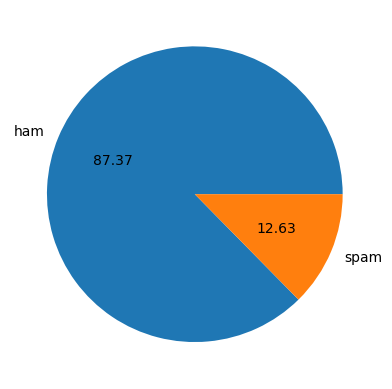

In [39]:
plt.pie(dataset['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [41]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [41]:
import nltk

In [43]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jayesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jayesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [45]:
dataset['num_characters']=dataset['text'].apply(len)

In [47]:
dataset.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [49]:
dataset['num_words']=dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [51]:
dataset.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [53]:
dataset['num_sentence']=dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [55]:
dataset.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [57]:
dataset.describe()

,target,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [59]:
dataset[dataset['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [61]:
dataset[dataset['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [63]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

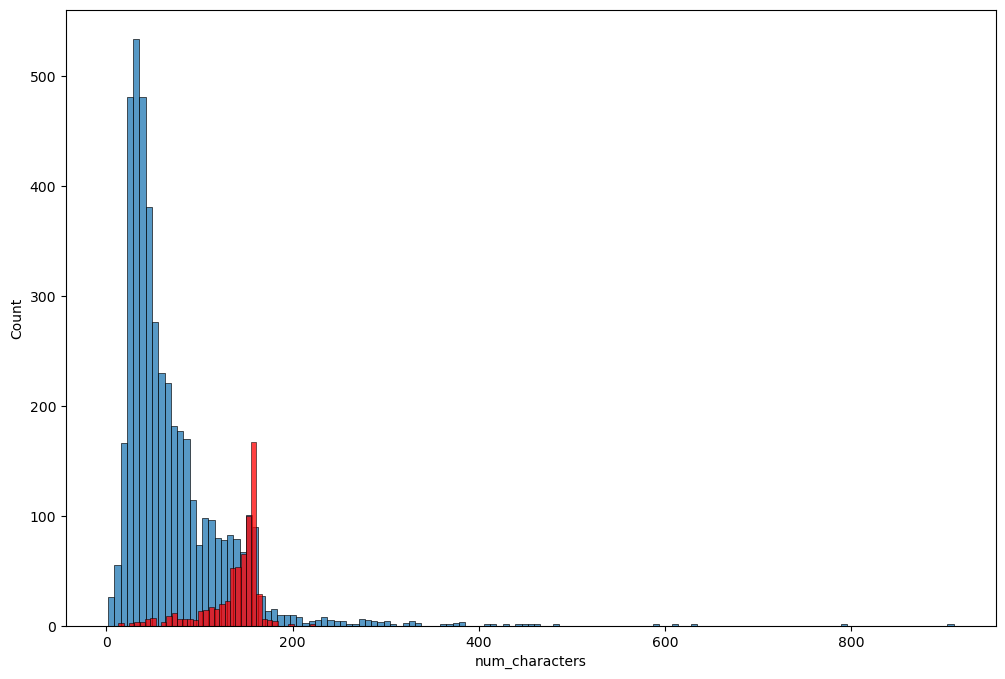

In [65]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['target']==0]['num_characters'])
sns.histplot(dataset[dataset['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

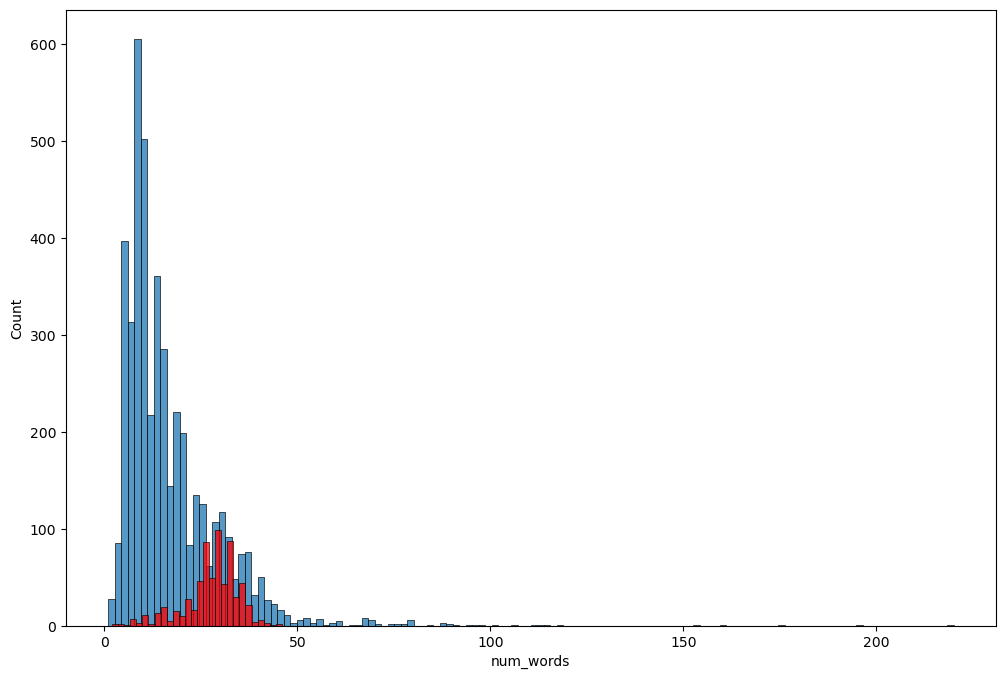

In [67]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['target']==0]['num_words'])
sns.histplot(dataset[dataset['target']==1]['num_words'],color='red')

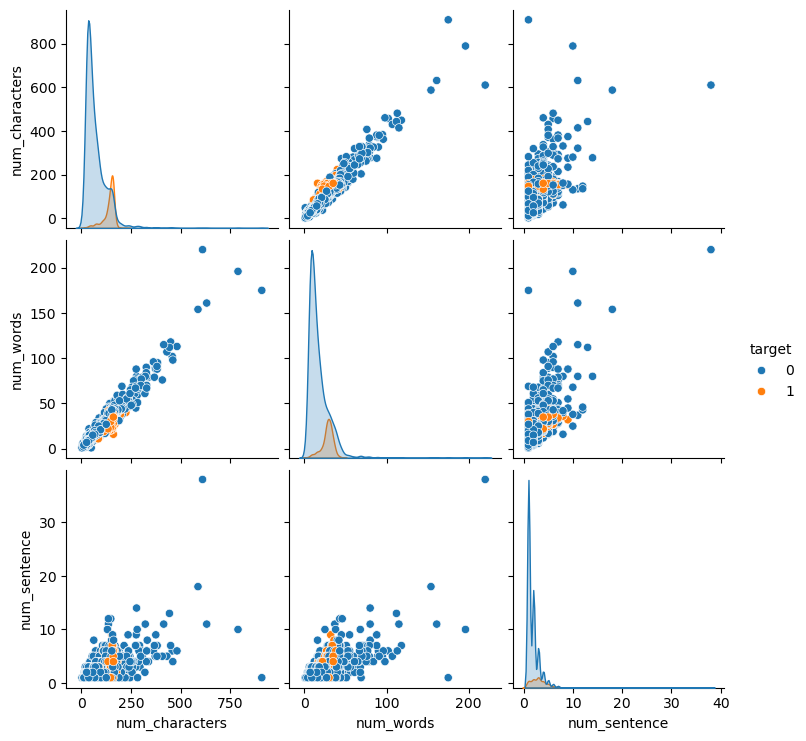

In [69]:
sns.pairplot(dataset,hue='target')

C:\Users\Jayesh\AppData\Local\Temp\ipykernel_3448\3387572453.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

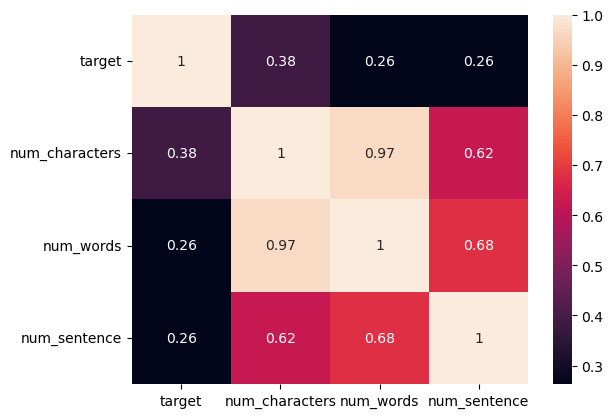

In [71]:
sns.heatmap(dataset.corr(),annot=True)

In [79]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [73]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [75]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [81]:
transform_text(dataset['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [85]:
dataset['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [83]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [85]:
dataset['transformed_text']=dataset['text'].apply(transform_text)

In [87]:
dataset.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [81]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [89]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [91]:
spam_wc=wc.generate(dataset[dataset['target']==1]['transformed_text'].str.cat(sep=" "))

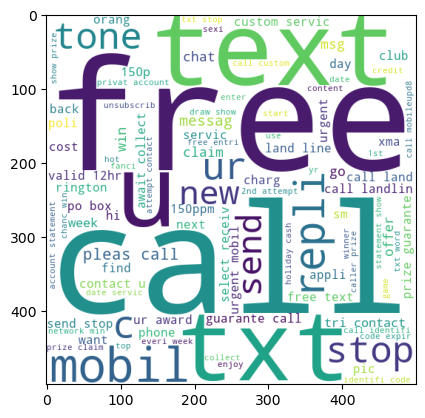

In [93]:
plt.imshow(spam_wc)

In [95]:
ham_wc=wc.generate(dataset[dataset['target']==0]['transformed_text'].str.cat(sep=" "))

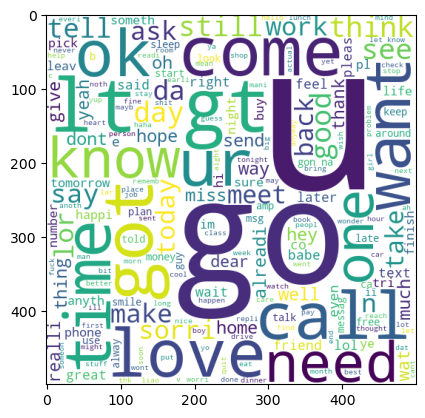

In [97]:
plt.imshow(ham_wc)

In [99]:
spam_corpus=[]
for msg in dataset[dataset['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [101]:
len(spam_corpus)

9939

C:\Users\Jayesh\AppData\Local\Temp\ipykernel_3448\2517438238.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='hsv')


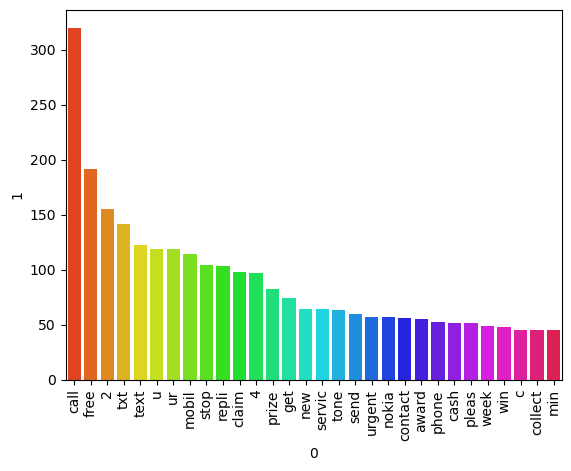

In [103]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='hsv')
plt.xticks(rotation='vertical')
plt.show()

In [105]:
ham_corpus=[]
for msg in dataset[dataset['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [107]:
len(ham_corpus)

35404

C:\Users\Jayesh\AppData\Local\Temp\ipykernel_3448\934219292.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='hsv')


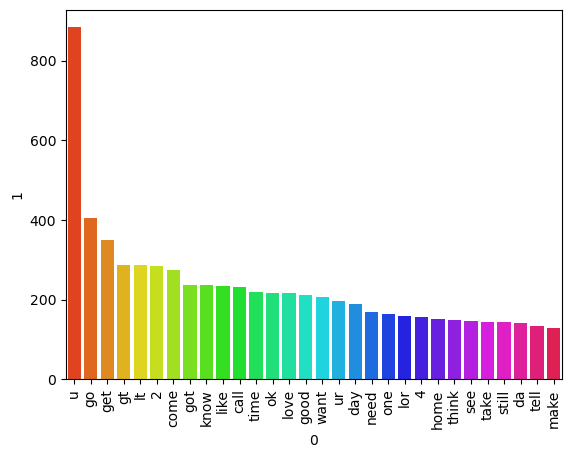

In [109]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='hsv')
plt.xticks(rotation='vertical')
plt.show()

In [111]:
dataset.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [113]:
# Model Building

In [277]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [117]:
# Using CountVectorizer

In [119]:
X=cv.fit_transform(dataset['transformed_text']).toarray()

In [121]:
X.shape

(5169, 6708)

In [123]:
y=dataset['target'].values

In [125]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [127]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [131]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [133]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [135]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [137]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [138]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [141]:
#Using tfidfVectorizer we have checked the accuracy of the model and we have selected mnb

In [279]:
a=tfidf.fit_transform(dataset['transformed_text']).toarray()

In [281]:
a.shape

(5169, 6708)

In [283]:
b=dataset['target'].values

In [285]:
b

array([0, 0, 1, ..., 0, 0, 0])

In [287]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=2)

In [153]:
gnb.fit(a_train,b_train)
b_pred1=gnb.predict(a_test)
print(accuracy_score(b_test,b_pred1))
print(confusion_matrix(b_test,b_pred1))
print(precision_score(b_test,b_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [289]:
mnb.fit(a_train,b_train)
b_pred2=mnb.predict(a_test)
print(accuracy_score(b_test,b_pred2))
print(confusion_matrix(b_test,b_pred2))
print(precision_score(b_test,b_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [157]:
bnb.fit(a_train,b_train)
b_pred3=bnb.predict(a_test)
print(accuracy_score(b_test,b_pred3))
print(confusion_matrix(b_test,b_pred3))
print(precision_score(b_test,b_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [161]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [163]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [165]:
def train_classifier(clf,a_train,b_train,a_test,b_test):
    clf.fit(a_train,b_train)
    b_pred=clf.predict(a_test)
    accuracy=accuracy_score(b_test,b_pred)
    precision=precision_score(b_test,b_pred)
    return accuracy,precision

In [167]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,a_train,b_train,a_test,b_test)
    print("For",name)
    print("Accuracy",current_accuracy)
    print("Precision",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy 0.9729206963249516
Precision 0.9741379310344828
For KN
Accuracy 0.9003868471953579
Precision 1.0
For NB
Accuracy 0.9593810444874274
Precision 1.0
For DT
Accuracy 0.9361702127659575
Precision 0.8461538461538461
For LR
Accuracy 0.9516441005802708
Precision 0.94
For RF
Accuracy 0.971953578336557
Precision 1.0


C:\Users\Jayesh\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy 0.9613152804642167
Precision 0.9454545454545454
For BgC
Accuracy 0.9584139264990329
Precision 0.8625954198473282
For ETC
Accuracy 0.9729206963249516
Precision 0.9824561403508771
For GBDT
Accuracy 0.9526112185686654
Precision 0.9238095238095239
For xgb
Accuracy 0.9729206963249516
Precision 0.9435483870967742


In [169]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [171]:
performance_df.sort_values(by=['Precision','Accuracy'],ascending=False)

,Algorithm,Accuracy,Precision
5,RF,0.971954,1.000000
2,NB,0.959381,1.000000
1,KN,0.900387,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [173]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [175]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,KN,Accuracy,0.900387
2,NB,Accuracy,0.959381
3,DT,Accuracy,0.936170
4,LR,Accuracy,0.951644
5,RF,Accuracy,0.971954
6,AdaBoost,Accuracy,0.961315
7,BgC,Accuracy,0.958414
8,ETC,Accuracy,0.972921
9,GBDT,Accuracy,0.952611


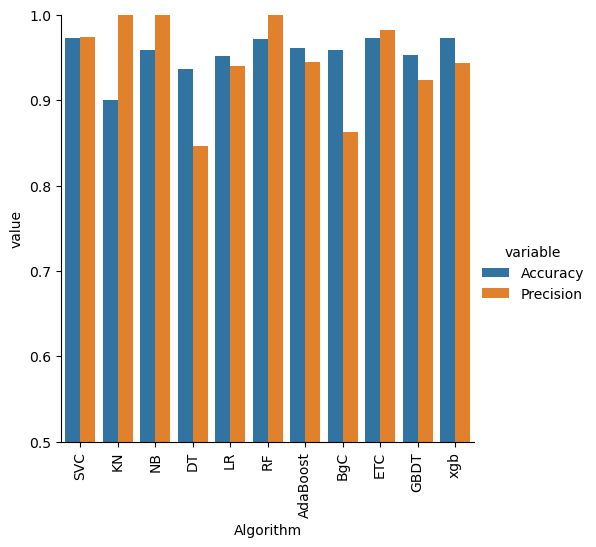

In [177]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [179]:
#model improvement

In [181]:
tfidf=TfidfVectorizer(max_features=3000)

In [183]:
a=tfidf.fit_transform(dataset['transformed_text']).toarray()

In [185]:
b=dataset['target'].values

In [187]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=2)

In [189]:
def train_classifier(clf,a_train,b_train,a_test,b_test):
    clf.fit(a_train,b_train)
    b_pred=clf.predict(a_test)
    accuracy=accuracy_score(b_test,b_pred)
    precision=precision_score(b_test,b_pred)
    return accuracy,precision

In [191]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,a_train,b_train,a_test,b_test)
    print("For",name)
    print("Accuracy",current_accuracy)
    print("Precision",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy 0.9758220502901354
Precision 0.9747899159663865
For KN
Accuracy 0.9052224371373307
Precision 1.0
For NB
Accuracy 0.9709864603481625
Precision 1.0
For DT
Accuracy 0.9274661508704062
Precision 0.8118811881188119
For LR
Accuracy 0.9584139264990329
Precision 0.9702970297029703
For RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829


C:\Users\Jayesh\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy 0.960348162475822
Precision 0.9292035398230089
For BgC
Accuracy 0.9584139264990329
Precision 0.8682170542635659
For ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406
For GBDT
Accuracy 0.9468085106382979
Precision 0.9191919191919192
For xgb
Accuracy 0.9671179883945842
Precision 0.9262295081967213


In [193]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [195]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [197]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.972921,0.974138,0.975822,0.974790
1,KN,0.900387,1.000000,0.905222,1.000000
2,NB,0.959381,1.000000,0.970986,1.000000
3,DT,0.936170,0.846154,0.927466,0.811881
4,LR,0.951644,0.940000,0.958414,0.970297
5,RF,0.971954,1.000000,0.975822,0.982906
6,AdaBoost,0.961315,0.945455,0.960348,0.929204
7,BgC,0.958414,0.862595,0.958414,0.868217
8,ETC,0.972921,0.982456,0.974855,0.974576
9,GBDT,0.952611,0.923810,0.946809,0.919192


In [199]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
a=scaler.fit_transform(a)

In [201]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=2)

In [203]:
def train_classifier(clf,a_train,b_train,a_test,b_test):
    clf.fit(a_train,b_train)
    b_pred=clf.predict(a_test)
    accuracy=accuracy_score(b_test,b_pred)
    precision=precision_score(b_test,b_pred)
    return accuracy,precision

In [205]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,a_train,b_train,a_test,b_test)
    print("For",name)
    print("Accuracy",current_accuracy)
    print("Precision",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy 0.9690522243713733
Precision 0.9274193548387096
For KN
Accuracy 0.9052224371373307
Precision 0.9761904761904762
For NB
Accuracy 0.9787234042553191
Precision 0.9461538461538461
For DT
Accuracy 0.9303675048355899
Precision 0.8367346938775511
For LR
Accuracy 0.9671179883945842
Precision 0.9642857142857143
For RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829


C:\Users\Jayesh\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy 0.960348162475822
Precision 0.9292035398230089
For BgC
Accuracy 0.9584139264990329
Precision 0.8682170542635659
For ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406
For GBDT
Accuracy 0.9468085106382979
Precision 0.9191919191919192
For xgb
Accuracy 0.9671179883945842
Precision 0.9262295081967213


In [207]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})

In [209]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [211]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
1,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
2,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
3,DT,0.936170,0.846154,0.927466,0.811881,0.930368,0.836735
4,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
5,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
6,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
7,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217
8,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
9,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192


In [311]:
tfidf=TfidfVectorizer(max_features=3000)

In [313]:
a=tfidf.fit_transform(dataset['transformed_text']).toarray()

In [305]:
a=np.hstack((a,dataset['num_characters'].values.reshape(-1,1)))

In [307]:
a.shape

(5169, 3001)

In [315]:
b=dataset['target'].values

In [317]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=2)

In [227]:
gnb.fit(a_train,b_train)
b_pred1=gnb.predict(a_test)
print(accuracy_score(b_test,b_pred1))
print(confusion_matrix(b_test,b_pred1))
print(precision_score(b_test,b_pred1))

0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [319]:
mnb.fit(a_train,b_train)
b_pred2=mnb.predict(a_test)
print(accuracy_score(b_test,b_pred2))
print(confusion_matrix(b_test,b_pred2))
print(precision_score(b_test,b_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [231]:
bnb.fit(a_train,b_train)
b_pred3=bnb.predict(a_test)
print(accuracy_score(b_test,b_pred3))
print(confusion_matrix(b_test,b_pred3))
print(precision_score(b_test,b_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [233]:
def train_classifier(clf,a_train,b_train,a_test,b_test):
    clf.fit(a_train,b_train)
    b_pred=clf.predict(a_test)
    accuracy=accuracy_score(b_test,b_pred)
    precision=precision_score(b_test,b_pred)
    return accuracy,precision

In [235]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,a_train,b_train,a_test,b_test)
    print("For",name)
    print("Accuracy",current_accuracy)
    print("Precision",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\Jayesh\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For SVC
Accuracy 0.8665377176015474
Precision 0.0
For KN
Accuracy 0.9332688588007737
Precision 0.822429906542056
For NB
Accuracy 0.9410058027079303
Precision 1.0
For DT
Accuracy 0.9458413926499033
Precision 0.8867924528301887
For LR
Accuracy 0.9613152804642167
Precision 0.9622641509433962
For RF
Accuracy 0.9690522243713733
Precision 0.9818181818181818


C:\Users\Jayesh\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy 0.9642166344294004
Precision 0.9316239316239316
For BgC
Accuracy 0.9661508704061895
Precision 0.8992248062015504
For ETC
Accuracy 0.9787234042553191
Precision 0.9754098360655737
For GBDT
Accuracy 0.9506769825918762
Precision 0.9306930693069307
For xgb
Accuracy 0.9690522243713733
Precision 0.9416666666666667


In [237]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_nums_chars':accuracy_scores,'Precision_nums_chars':precision_scores})

In [239]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_nums_chars,Precision_nums_chars
0,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419,0.866538,0.000000
1,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.933269,0.822430
2,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.941006,1.000000
3,DT,0.936170,0.846154,0.927466,0.811881,0.930368,0.836735,0.945841,0.886792
4,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.961315,0.962264
5,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818
6,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624
7,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225
8,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410
9,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.950677,0.930693


In [271]:
import pickle
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))